In [1]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
(xTrain, yTrain) , (xTest,yTest) = keras.datasets.mnist.load_data()

In [3]:
len(xTrain)

60000

In [4]:
xTrain.shape

(60000, 28, 28)

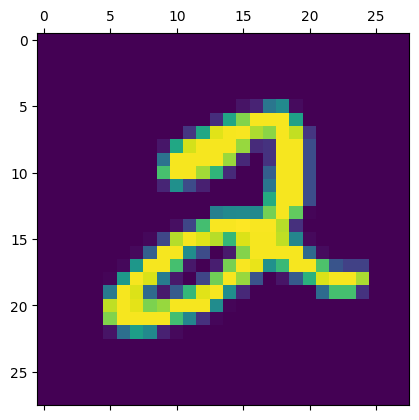

In [5]:
plt.matshow(xTrain[5])

In [6]:
yTrain[5]

2

In [7]:
xTrain = xTrain / 255
xTest = xTest / 255

In [8]:
xTrainF = xTrain.reshape(len(xTrain),28 * 28)
xTestF = xTest.reshape(len(xTest),28 * 28)

In [9]:
xTestF.shape

(10000, 784)

In [10]:
model = keras.Sequential([
        keras.layers.Dense(10, input_shape=(784,),activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']   
)

model.fit(xTrainF, yTrain, epochs = 10)

C:\Users\NoteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step - accuracy: 0.8126 - loss: 0.7223
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 490us/step - accuracy: 0.9137 - loss: 0.3101
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.9213 - loss: 0.2806
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.9238 - loss: 0.2737
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - accuracy: 0.9250 - loss: 0.2726
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.9280 - loss: 0.2589
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 0.9293 - loss: 0.2567
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.9291 - loss: 0.2556
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.9309 - loss: 0.2507
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step - accuracy: 0.9325 - loss: 0.2456


In [11]:
model.evaluate(xTestF,yTest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.9170 - loss: 0.2991


[0.26330119371414185, 0.9276999831199646]

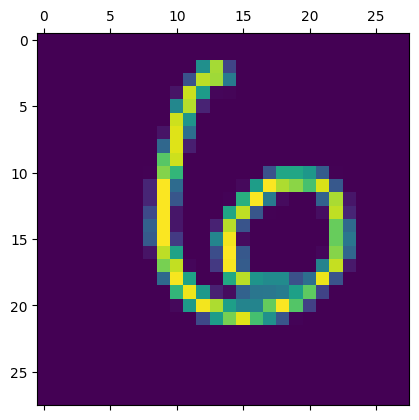

In [12]:
plt.matshow(xTest[100])

In [13]:
yPredicted = model.predict(xTestF)
yPredicted[100]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step


array([2.5533598e-03, 2.4755806e-02, 5.3318417e-01, 2.0009872e-02,
       3.6972379e-03, 5.2473287e-04, 9.7105634e-01, 2.2436543e-04,
       3.6833496e-03, 4.2831285e-05], dtype=float32)

In [14]:
np.argmax(yPredicted[100])

6

In [15]:
y_predicted_labels = [np.argmax(i) for i in yPredicted ]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [16]:
cm = tf.math.confusion_matrix(labels = yTest, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   8,    9,  921,   15,    8,    4,   12,    9,   42,    4],
       [   3,    0,   17,  924,    1,   22,    3,    9,   23,    8],
       [   1,    1,    5,    2,  914,    0,    9,    4,   10,   36],
       [  10,    3,    1,   25,    8,  781,   17,    7,   33,    7],
       [  13,    3,    9,    1,    7,   10,  912,    1,    2,    0],
       [   2,    6,   24,    4,    7,    1,    0,  949,    2,   33],
       [   9,    9,    6,   17,    9,   21,   10,   10,  873,   10],
       [  11,    8,    1,    8,   23,    6,    0,   19,    7,  926]])>

Text(95.72222222222221, 0.5, 'Truth')

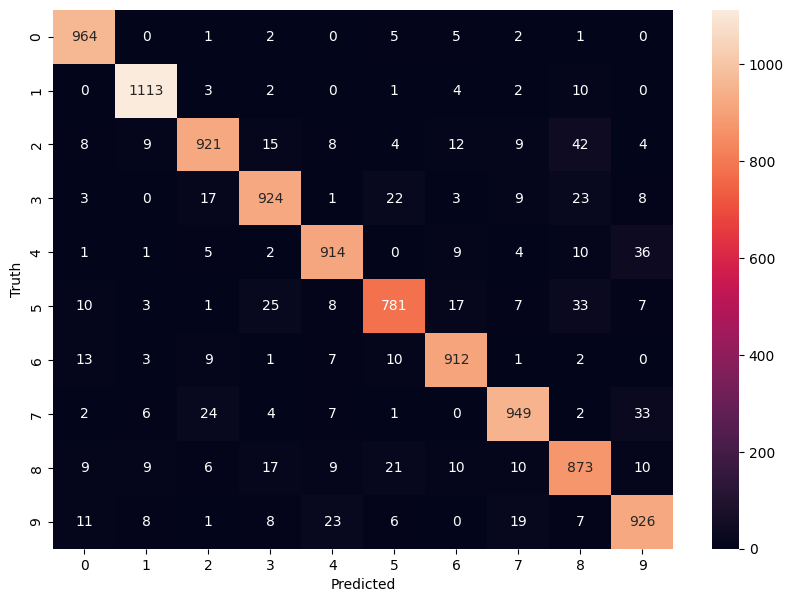

In [17]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot= True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [23]:
model = keras.Sequential([
        keras.layers.Dense(100, input_shape=(784,),activation = 'relu'),
        keras.layers.Dense(10,activation = 'sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir = "logs/HRDC/", histogram_freq = 1)
model.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']   
)

model.fit(xTrainF, yTrain, epochs = 10,callbacks =[tb_callback])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - accuracy: 0.7368 - loss: 1.0108
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 822us/step - accuracy: 0.9006 - loss: 0.3542
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 809us/step - accuracy: 0.9132 - loss: 0.3041
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - accuracy: 0.9247 - loss: 0.2696
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - accuracy: 0.9308 - loss: 0.2453
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 797us/step - accuracy: 0.9361 - loss: 0.2298
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 823us/step - accuracy: 0.9420 - loss: 0.2063
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - accuracy: 0.9460 - loss: 0.1903
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.9480 - loss: 0.1838
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.9503 - loss: 0.1757


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step


Text(95.72222222222221, 0.5, 'Truth')

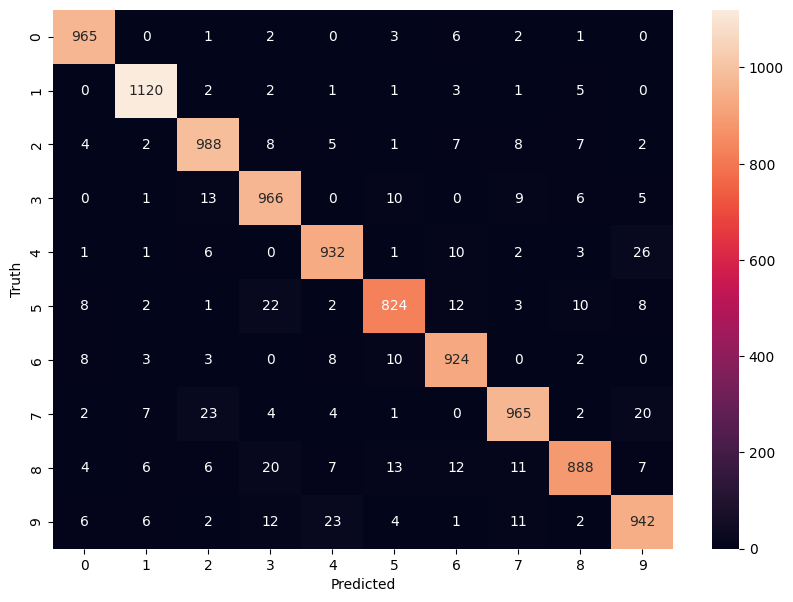

In [24]:
yPredicted = model.predict(xTestF)
y_predicted_labels = [np.argmax(i) for i in yPredicted ]
cm = tf.math.confusion_matrix(labels = yTest, predictions = y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot= True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
%load_ext tensorboard
%tensorboard --logdir logs/HRDC

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 57852), started 0:10:37 ago. (Use '!kill 57852' to kill it.)